In [1]:
# this notebook follows on from GROUP_mergeData_filterData_prepForML

<div style='color: FloralWhite; padding: 2rem; background-image: radial-gradient(farthest-corner at 40px 40px,
      #f35 0%, #43e 100%); font-weight: 500'>
<h2 style='padding: 0; margin-bottom: 1rem; margin-top:0;'> NEXT STEPS </h2> 
<li>impute missing values</li>
<li>look at pattern and % missing values for analytes we're interested in {done}</li>
<li>case/control distributions of key analytes {done}</li>
<li>read the stats from Rachel's thesis</li>
<li>one-hot encoding of categorical columns </li>
<li>PCA, try some basic models</li>
    </div>

In [2]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 500
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('../Data/big_cats/processed_data/filtered_data_26052021.csv')
data.head()

,ARKS Number,Acute kidney failure,Age at Death,CKD - cause of mortality,CKD - co-morbidity,Date of Birth,Infection,Neoplasia,Neurological,Old Age debility,Respiratory/Cardiovascular,Sex,Species (common name),Trauma,Date,haem: RBC (x 10^12/L),haem: haemoglobin (g/L),haem: HCT (%),haem: Total Protein (refractometer),haem: leukocyte count (x10^9/L),haem: neutrophils (%),haem: neutrophils (band),haem: neutrophils(seg) (x10^9/L),haem: lymphocytes (x10^9/L),haem: lymphocytes (%),haem: monocytes (x10^9/L),haem: monocytes (%),haem: eosinophils (x10^9/L),haem: eosinophils (%),haem: estimated platelets x 10^9/L (Hi),haem: MCV (fL),haem: MCHC (g/L),haem: MCH (pg),biochem: Low USG?,biochem: BUN (mmol/L),biochem: Hypercreatininaemia?,biochem: Creatinine (umol/L),biochem: Total Plasma Protein (g/L),biochem: Serum Albumin (g/L),biochem: Globulins (g/L),biochem: Anaemic? <25,biochem: Haematocrit (%),biochem: Potassium (mmol/L),biochem: Calcium (mmol/L),biochem: Hyperphosphataemia? >2_9 to 3,biochem: Phosphate (mmol/L),biochem: Sodium (mmol/L),biochem: Chloride (mmol/L),biochem: Bicarbonate,biochem: Glucose,biochem: CK (U/L),biochem: ALP (U/L),biochem: ALT (U/L),biochem: AST,biochem: Amylase,biochem: Cholesterol (mmol/L),biochem: Bilirubin,urine: Urine Specific Gravity,urine: Low USG?,urine: Azotaemia?,urine: Urine protein (g/L),urine: urine creatinine (umol/l),urine: Protein:creatinine ratio,urine: Proteinuric UPC greater 0:4,urine: glucose (Multistix),urine: bilirubin (Multistix),urine: ketones (Multistix),urine: blood (Hb -Multistix),urine: pH,urine: protein (Multistix),urine: Positive urine culture,urine: leukocytes (/cumm)x,urine: blood (RBC/ ul) (haematuriax,urine: Lipid,urine: Casts,urine: Epith cells,urine: Crystals,urine: Organisms,urine: Contaminants?,usg_maxed_out,urine: blood haemolysed,Date dt,Date of Birth dt,age at visit,num visits
0,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1987-02-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,NaN,False,27.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,False,trace,nil,nil,nil,6.5,1+,False,NaN,NaN,False,False,False,False,False,False,0,0,1987-02-02,1974-01-01,4780 days 00:00:00.000000000,5
1,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1988-05-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,89.0,NaN,NaN,False,41.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.044,False,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,6.0,1+,False,NaN,NaN,False,False,False,False,False,False,0,0,1988-05-28,1974-01-01,5261 days 00:00:00.000000000,5
2,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1988-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,11.85,True,319.0,NaN,NaN,NaN,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,1432.0,NaN,NaN,NaN,NaN,NaN,NaN,1.028,True,True,NaN,NaN,NaN,False,nil,nil,nil,nil,6.5,1+,False,NaN,NaN,False,False,False,False,False,False,0,0,1988-06-01,1974-01-01,5265 days 00:00:00.000000000,5
3,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1988-11-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,12.51,False,NaN,70.0,36.0,34.0,False,45.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,102.0,13.0,46.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1988-11-08,1974-01-01,5425 days 00:00:00.000000000,5
4,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1987-02-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [4]:
len(data)

1438

In [5]:
missing_dict = dict(data.isna().sum().sort_values(ascending=False))

In [6]:
missing_dict

{'urine: urine creatinine (umol/l)': 1377,
 'urine: Urine protein (g/L)': 1377,
 'urine: Protein:creatinine ratio': 1370,
 'haem: MCH (pg)': 1370,
 'haem: MCV (fL)': 1320,
 'haem: MCHC (g/L)': 1311,
 'haem: neutrophils (band)': 1307,
 'haem: estimated platelets x 10^9/L (Hi)': 1254,
 'haem: eosinophils (%)': 1245,
 'haem: monocytes (%)': 1229,
 'haem: lymphocytes  (%)': 1208,
 'urine: leukocytes (/cumm)x': 1195,
 'urine: blood (RBC/ ul) (haematuriax': 1190,
 'haem: Total Protein (refractometer)': 1189,
 'haem: neutrophils (%)': 1151,
 'haem: eosinophils  (x10^9/L)': 1149,
 'haem: RBC (x 10^12/L)': 1148,
 'haem: neutrophils(seg) (x10^9/L)': 1127,
 'haem: monocytes (x10^9/L)': 1108,
 'biochem: Amylase': 1099,
 'haem: lymphocytes (x10^9/L)': 1093,
 'haem: haemoglobin (g/L)': 1005,
 'haem: leukocyte count (x10^9/L)': 992,
 'haem: HCT (%)': 983,
 'biochem: Bicarbonate': 887,
 'biochem: Cholesterol (mmol/L)': 870,
 'urine: bilirubin (Multistix)': 841,
 'urine: ketones (Multistix)': 827,
 'ur

In [7]:
missing_percent = data.isna().sum().sort_values(ascending=False).divide(len(data))

In [8]:
dict(missing_percent)

{'urine: urine creatinine (umol/l)': 0.9575799721835884,
 'urine: Urine protein (g/L)': 0.9575799721835884,
 'urine: Protein:creatinine ratio': 0.952712100139082,
 'haem: MCH (pg)': 0.952712100139082,
 'haem: MCV (fL)': 0.9179415855354659,
 'haem: MCHC (g/L)': 0.911682892906815,
 'haem: neutrophils (band)': 0.9089012517385258,
 'haem: estimated platelets x 10^9/L (Hi)': 0.8720445062586927,
 'haem: eosinophils (%)': 0.8657858136300417,
 'haem: monocytes (%)': 0.8546592489568846,
 'haem: lymphocytes  (%)': 0.8400556328233658,
 'urine: leukocytes (/cumm)x': 0.8310152990264256,
 'urine: blood (RBC/ ul) (haematuriax': 0.827538247566064,
 'haem: Total Protein (refractometer)': 0.8268428372739917,
 'haem: neutrophils (%)': 0.8004172461752433,
 'haem: eosinophils  (x10^9/L)': 0.7990264255910987,
 'haem: RBC (x 10^12/L)': 0.7983310152990264,
 'haem: neutrophils(seg) (x10^9/L)': 0.7837273991655076,
 'haem: monocytes (x10^9/L)': 0.7705146036161336,
 'biochem: Amylase': 0.7642559109874826,
 'haem:

In [9]:
data_more_than1visit = data[data['num visits'] >1 ]
len(data_more_than1visit)

1404

In [10]:
dict(data_more_than1visit.isna().sum().sort_values(ascending=False).divide(len(data_more_than1visit)))

{'urine: urine creatinine (umol/l)': 0.9572649572649573,
 'urine: Urine protein (g/L)': 0.9572649572649573,
 'haem: MCH (pg)': 0.9529914529914529,
 'urine: Protein:creatinine ratio': 0.9522792022792023,
 'haem: MCV (fL)': 0.9173789173789174,
 'haem: MCHC (g/L)': 0.9109686609686609,
 'haem: neutrophils (band)': 0.9088319088319088,
 'haem: estimated platelets x 10^9/L (Hi)': 0.8696581196581197,
 'haem: eosinophils (%)': 0.8646723646723646,
 'haem: monocytes (%)': 0.8532763532763533,
 'haem: lymphocytes  (%)': 0.8383190883190883,
 'urine: leukocytes (/cumm)x': 0.8297720797720798,
 'urine: blood (RBC/ ul) (haematuriax': 0.8254985754985755,
 'haem: Total Protein (refractometer)': 0.8240740740740741,
 'haem: neutrophils (%)': 0.7977207977207977,
 'haem: eosinophils  (x10^9/L)': 0.7962962962962963,
 'haem: RBC (x 10^12/L)': 0.7948717948717948,
 'haem: neutrophils(seg) (x10^9/L)': 0.7799145299145299,
 'haem: monocytes (x10^9/L)': 0.7670940170940171,
 'biochem: Amylase': 0.7606837606837606,
 'h

In [11]:
# look at pattern of missing values for key analytes

In [12]:
key_features = ['biochem: Creatinine (umol/L)', 'biochem: BUN (mmol/L)', 'urine: Urine Specific Gravity']

In [13]:
data_more_than1visit['num key features missing'] = data_more_than1visit[key_features].isna().sum(axis=1)

/Users/ruth/miniconda3/envs/vetAI/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
data_more_than1visit

,ARKS Number,Acute kidney failure,Age at Death,CKD - cause of mortality,CKD - co-morbidity,Date of Birth,Infection,Neoplasia,Neurological,Old Age debility,Respiratory/Cardiovascular,Sex,Species (common name),Trauma,Date,haem: RBC (x 10^12/L),haem: haemoglobin (g/L),haem: HCT (%),haem: Total Protein (refractometer),haem: leukocyte count (x10^9/L),haem: neutrophils (%),haem: neutrophils (band),haem: neutrophils(seg) (x10^9/L),haem: lymphocytes (x10^9/L),haem: lymphocytes (%),haem: monocytes (x10^9/L),haem: monocytes (%),haem: eosinophils (x10^9/L),haem: eosinophils (%),haem: estimated platelets x 10^9/L (Hi),haem: MCV (fL),haem: MCHC (g/L),haem: MCH (pg),biochem: Low USG?,biochem: BUN (mmol/L),biochem: Hypercreatininaemia?,biochem: Creatinine (umol/L),biochem: Total Plasma Protein (g/L),biochem: Serum Albumin (g/L),biochem: Globulins (g/L),biochem: Anaemic? <25,biochem: Haematocrit (%),biochem: Potassium (mmol/L),biochem: Calcium (mmol/L),biochem: Hyperphosphataemia? >2_9 to 3,biochem: Phosphate (mmol/L),biochem: Sodium (mmol/L),biochem: Chloride (mmol/L),biochem: Bicarbonate,biochem: Glucose,biochem: CK (U/L),biochem: ALP (U/L),biochem: ALT (U/L),biochem: AST,biochem: Amylase,biochem: Cholesterol (mmol/L),biochem: Bilirubin,urine: Urine Specific Gravity,urine: Low USG?,urine: Azotaemia?,urine: Urine protein (g/L),urine: urine creatinine (umol/l),urine: Protein:creatinine ratio,urine: Proteinuric UPC greater 0:4,urine: glucose (Multistix),urine: bilirubin (Multistix),urine: ketones (Multistix),urine: blood (Hb -Multistix),urine: pH,urine: protein (Multistix),urine: Positive urine culture,urine: leukocytes (/cumm)x,urine: blood (RBC/ ul) (haematuriax,urine: Lipid,urine: Casts,urine: Epith cells,urine: Crystals,urine: Organisms,urine: Contaminants?,usg_maxed_out,urine: blood haemolysed,Date dt,Date of Birth dt,age at visit,num visits,num key features missing
0,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1987-02-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,NaN,False,27.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,False,trace,nil,nil,nil,6.5,1+,False,NaN,NaN,False,False,False,False,False,False,0,0,1987-02-02,1974-01-01,4780 days 00:00:00.000000000,5,3
1,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1988-05-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,89.0,NaN,NaN,False,41.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.044,False,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,6.0,1+,False,NaN,NaN,False,False,False,False,False,False,0,0,1988-05-28,1974-01-01,5261 days 00:00:00.000000000,5,2
2,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1988-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,11.85,True,319.0,NaN,NaN,NaN,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,1432.0,NaN,NaN,NaN,NaN,NaN,NaN,1.028,True,True,NaN,NaN,NaN,False,nil,nil,nil,nil,6.5,1+,False,NaN,NaN,False,False,False,False,False,False,0,0,1988-06-01,1974-01-01,5265 days 00:00:00.000000000,5,0
3,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1988-11-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,12.51,False,NaN,70.0,36.0,34.0,False,45.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,102.0,13.0,46.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1988-11-08,1974-01-01,5425 days 00:00:00.000000000,5,2
4,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1987-02-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

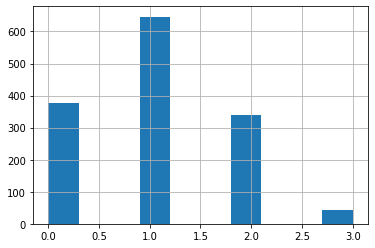

In [15]:
data_more_than1visit['num key features missing'].hist()

In [16]:
# look at cases and controls

In [17]:
cases = data_more_than1visit[data_more_than1visit['CKD - cause of mortality'] == True]
controls = data_more_than1visit[data_more_than1visit['CKD - cause of mortality'] == False]

In [18]:
len(cases)

650

In [19]:
len(controls)

754

/Users/ruth/miniconda3/envs/vetAI/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ruth/miniconda3/envs/vetAI/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


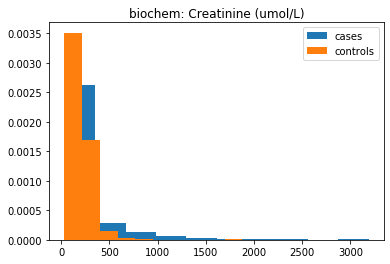

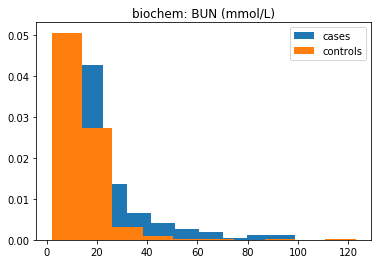

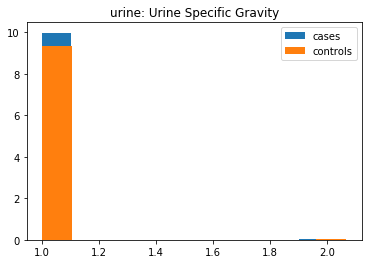

In [20]:
for feature in key_features:
    fig, ax0 = plt.subplots(nrows=1, ncols=1)
    ax0.hist(cases[feature], density=True, histtype='bar', label='cases')
    ax0.hist(controls[feature], density=True, histtype='bar', label='controls')
    ax0.legend(prop={'size': 10})
    ax0.set_title(feature)

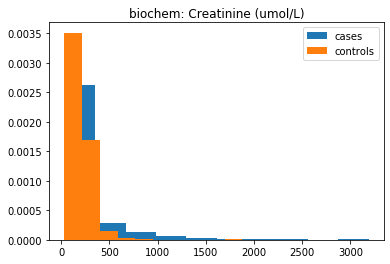

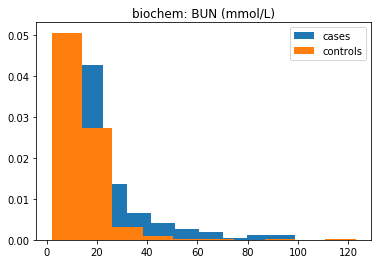

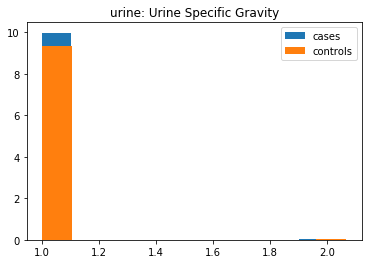

In [21]:
for feature in key_features:
    plt.hist(cases[feature], label = 'cases', stacked=True, histtype='bar', density = True)
    plt.hist(controls[feature], label = 'controls', stacked=True, histtype='bar', density = True)
    plt.title(feature)
    plt.legend()
    plt.show()

<div style='color: FloralWhite; padding: 2rem; background-image: radial-gradient(farthest-corner at 40px 40px,
      #008080 0%, #43e 100%); font-weight: 500'>
<h2 style='padding: 0; margin-bottom: 1rem; margin-top:0;'> PREPARING FOR PCA </h2> 
 -- We are currently working on feature engineering ordinal variables.  We have done the first example for bilirubin but need to re-assign it --
<li>Choose features based on % missing</li>
<li> Make sure all chosen features are clean (some have less than signs) </li>
<li> Feature engineering of ordinal variables </li>
<li>Impute remaining contnuous features </li>
<li> One hot encode </li>
<li> PC motherfucking A </li>

</div>

In [24]:
ordinals = ['urine: bilirubin (Multistix)', 'urine: ketones (Multistix)', 'urine: glucose (Multistix)', 
            'urine: blood (Hb -Multistix)', 'urine: pH', 'urine: protein (Multistix)']

In [28]:
feature = ordinals[0]
data_more_than1visit[[feature]][feature].value_counts()

nil         531
negative     22
1+           19
3+            9
2+            4
4+            2
trace         1
Name: urine: bilirubin (Multistix), dtype: int64

In [37]:
bilirubin_dict = {'nil': 0, 'negative': 0, 'trace': 0, '1+': 20, '2+': 40, '3+': 100, '4+': 100} # this scaling came from ruth's feline medicine book

In [40]:
data_more_than1visit[feature].replace(bilirubin_dict).value_counts()

0.0      554
20.0      19
100.0     11
40.0       4
Name: urine: bilirubin (Multistix), dtype: int64